### Telco Churn Analysis

**Dataset Info:** Sample Data Set containing Telco customer data and showing customers left last month.

In [1]:
#imported the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

**Load the dataset**

In [2]:
telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_base_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
telco_base_data.shape

(7043, 21)

In [6]:
# Checking the data types of all columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Checking the descriptive statistics of all numeric columns
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior Citizen is actually a categorical variable, that's why the values of 25%-50%-75% is not proper.

75% of customers are having tenure of 55 months.

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month.

In [8]:
telco_base_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.02, 'Count of target variable per category')

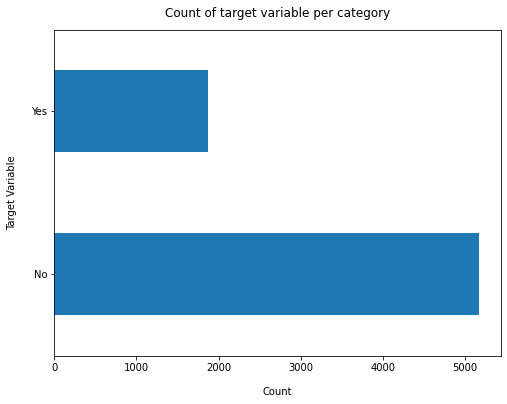

In [9]:
telco_base_data['Churn'].value_counts().plot(kind = 'barh',figsize = (8,6))
plt.xlabel('Count',labelpad = 14)
plt.ylabel('Target Variable',labelpad = 14)
plt.title('Count of target variable per category',y = 1.02)

In [10]:
100 * telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [11]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data is highly imbalanced, ratio = 73:26

So we analyze the data with other features while taking the target values separately to get some insights.

In [12]:
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
#missing.columns = ['index', 'percentage']

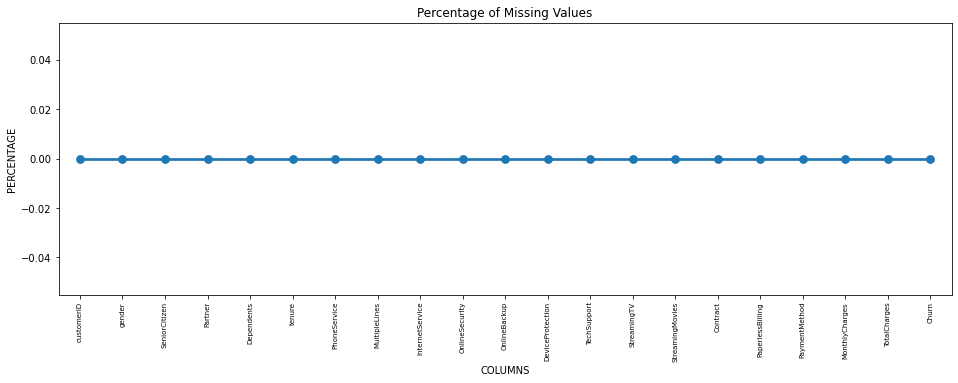

In [14]:
plt.figure(figsize=(16, 5))

# Assuming `missing` is a DataFrame with columns: ['index', 'percentage']
sns.pointplot(data=missing, x='index', y=0)

plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

**Missing data - Initial Intuition** 

* Here, we don't have any missing data.

General Thumb Rule:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

**Data Cleaning**

**1**. Create a copy of base data for manupulation & processing

In [15]:
telco_base = telco_base_data.copy()

**2**. Total Charges should be numeric amount. Let's convert it to numerical data type

In [16]:
telco_base.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
telco_base['TotalCharges'] = pd.to_numeric(telco_base['TotalCharges'],errors='coerce')

In [18]:
telco_base.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3**. As we can see there are 11 missing values in TotalCharges column. Let's check these records

**4**. Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [19]:
telco_base.dropna(inplace = True)

In [20]:
telco_base.shape

(7032, 21)

**5**. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [21]:
def make_range(x):
    start = ((x - 1) // 12) * 12 + 1
    end = start + 11
    return f"{start}-{end}"

telco_base["tenure_group"] = telco_base["tenure"].apply(make_range)

In [22]:
telco_base.drop(columns = 'tenure',inplace = True)

In [23]:
telco_base['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [24]:
telco_base.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration

**1**. Plot distibution of individual predictors by churn

### Univariate Analysis

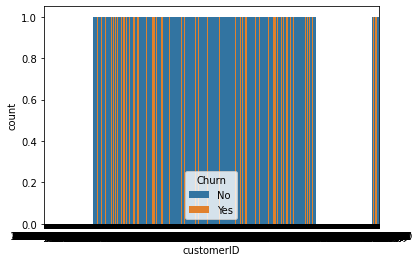

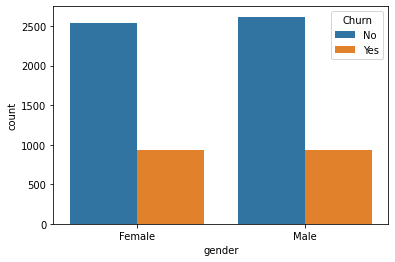

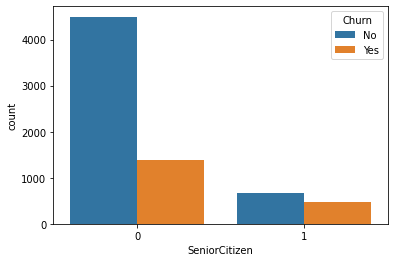

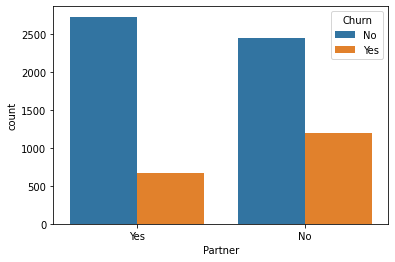

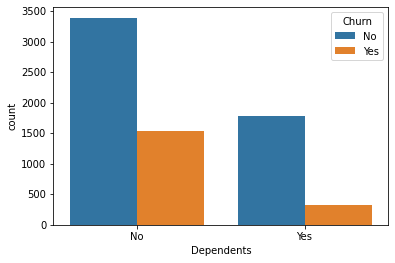

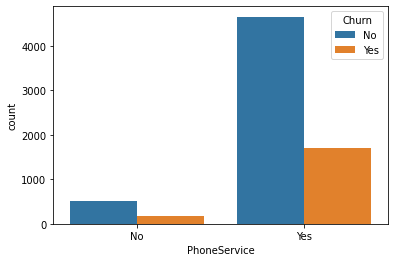

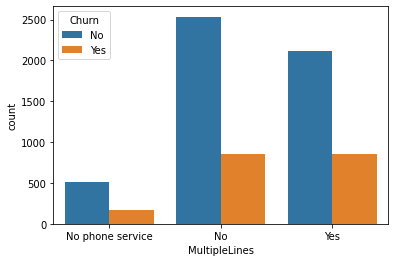

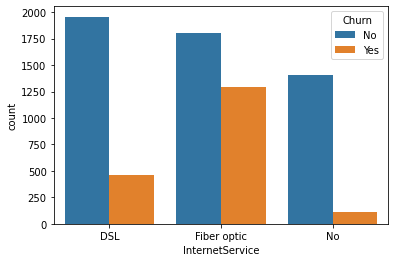

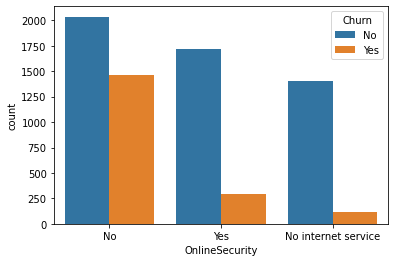

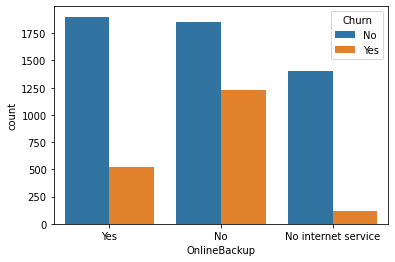

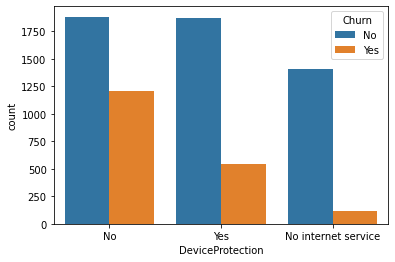

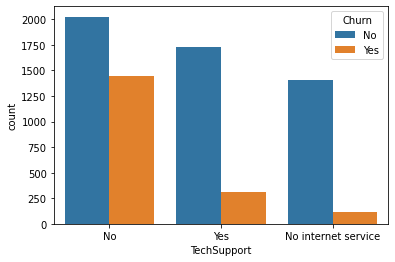

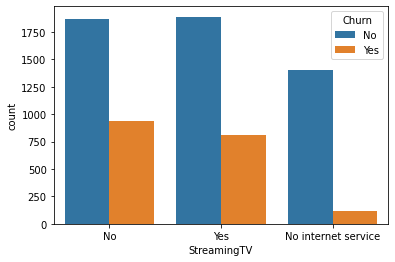

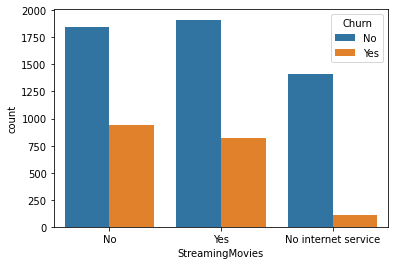

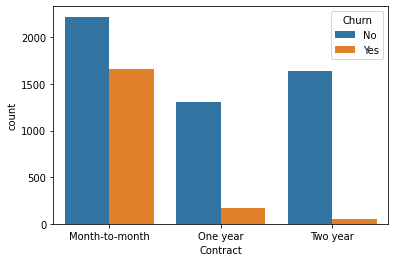

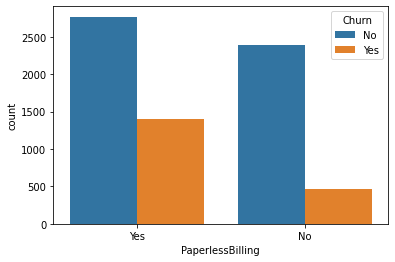

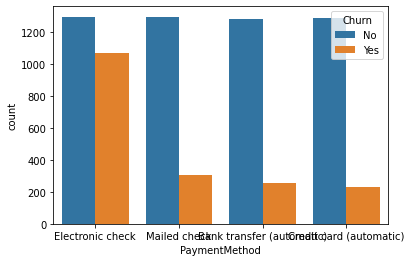

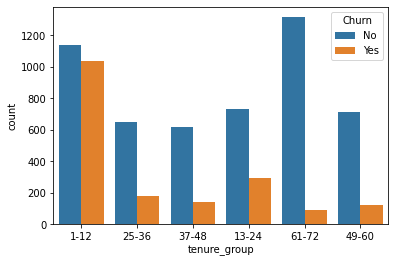

In [25]:
for i,predictor in enumerate(telco_base.drop(columns = ['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = telco_base,x = predictor, hue = 'Churn')

**2**. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [26]:
telco_base['Churn'] = np.where(telco_base['Churn'] == 'Yes',1,0)

In [27]:
telco_base.drop(columns = 'customerID',inplace = True)

**3**. Convert all the categorical variables into dummy variables

In [28]:
telco_base_dummies = pd.get_dummies(telco_base)
telco_base_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


**9**. Relationship between Monthly Charges and Total Charges

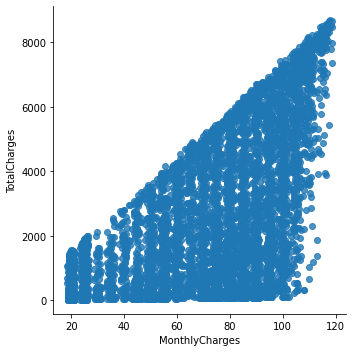

In [29]:
sns.lmplot(data=telco_base_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

**10**. Churn by Monthly Charges and Total Charges

<ipython-input-30-77ee99636dc4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_base_dummies.MonthlyCharges[(telco_base_dummies["Churn"] == 0) ],
<ipython-input-30-77ee99636dc4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_base_dummies.MonthlyCharges[(telco_base_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

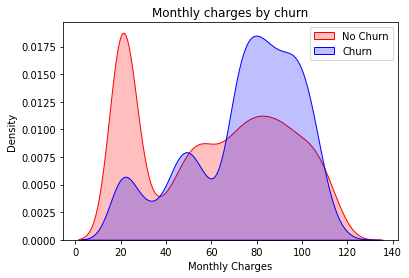

In [30]:
Mth = sns.kdeplot(telco_base_dummies.MonthlyCharges[(telco_base_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_base_dummies.MonthlyCharges[(telco_base_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges are high

<ipython-input-31-b15c6e4d01d0>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_dummies.TotalCharges[(telco_base_dummies["Churn"] == 0) ],
<ipython-input-31-b15c6e4d01d0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_dummies.TotalCharges[(telco_base_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

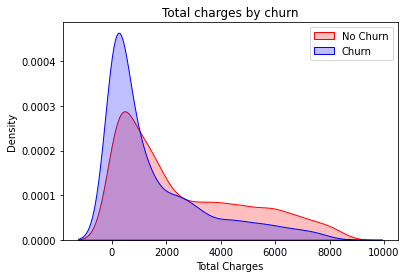

In [31]:
Tot = sns.kdeplot(telco_base_dummies.TotalCharges[(telco_base_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_base_dummies.TotalCharges[(telco_base_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight:** as higher Churn at lower Total Charges

In [36]:
telco_base_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int32  
 4   gender_Female                            7032 non-null   bool   
 5   gender_Male                              7032 non-null   bool   
 6   Partner_No                               7032 non-null   bool   
 7   Partner_Yes                              7032 non-null   bool   
 8   Dependents_No                            7032 non-null   bool   
 9   Dependents_Yes                           7032 non-null   bool   
 10  PhoneService_No                          7032 non-nul

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

**11**. Build a corelation of all predictors with 'Churn'

<Axes: >

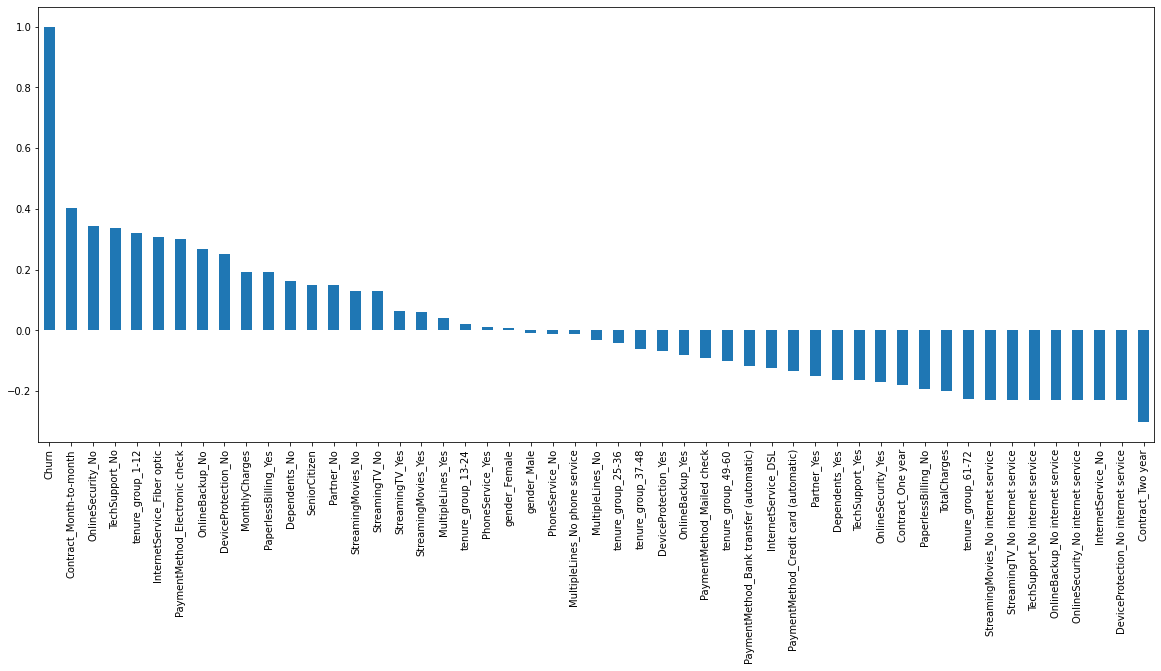

In [43]:
plt.figure(figsize=(20,8))
telco_base_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

**Derived Insight:**

HIGH Churn seen in case of **Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet**

LOW Churn is seens in case of **Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years**

Factors like **Gender, Availability of PhoneService** and # of multiple lines have alomost NO impact on Churn

### Bivariate Analysis

In [45]:
new_df1_target0 = telco_base.loc[telco_base['Churn'] == 0]
new_df1_target1 = telco_base.loc[telco_base['Churn'] == 1]

In [59]:
def uniplot(df,col,title,hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    # Adjust width based on number of categories
    n_cats = df[col].nunique()
    if hue is not None and hue in df.columns:
        n_hue = df[hue].nunique()
    else:
        n_hue = 0
    width = n_cats + 7 + 4 * n_hue

    fig, ax = plt.subplots(figsize=(width, 8))
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=hue,
        palette='bright',
        ax=ax
    )
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

In [60]:
new_df1_target1.Partner.value_counts()

Partner
No     1200
Yes     669
Name: count, dtype: int64

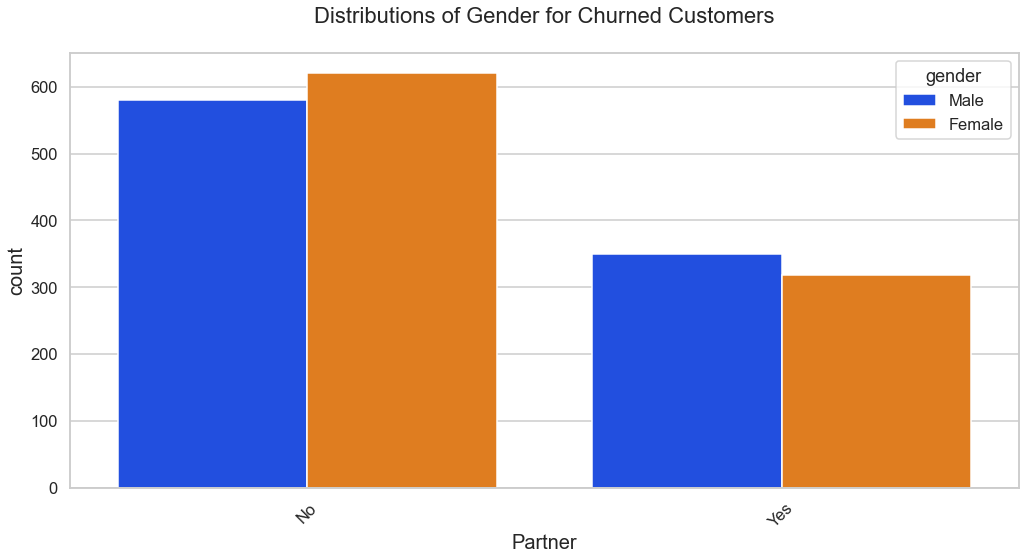

In [61]:
uniplot(new_df1_target1,col = 'Partner',title = 'Distributions of Gender for Churned Customers',hue = 'gender')

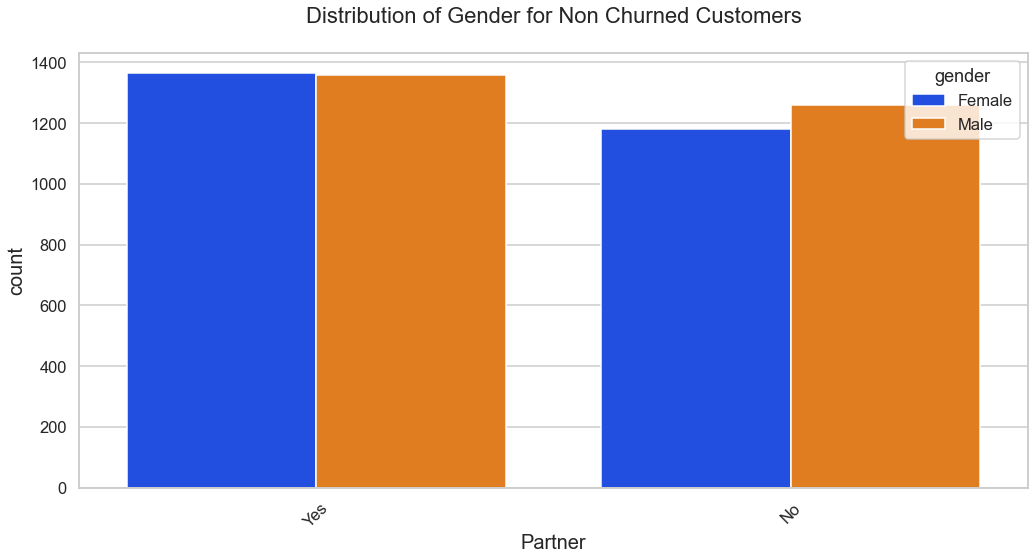

In [62]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

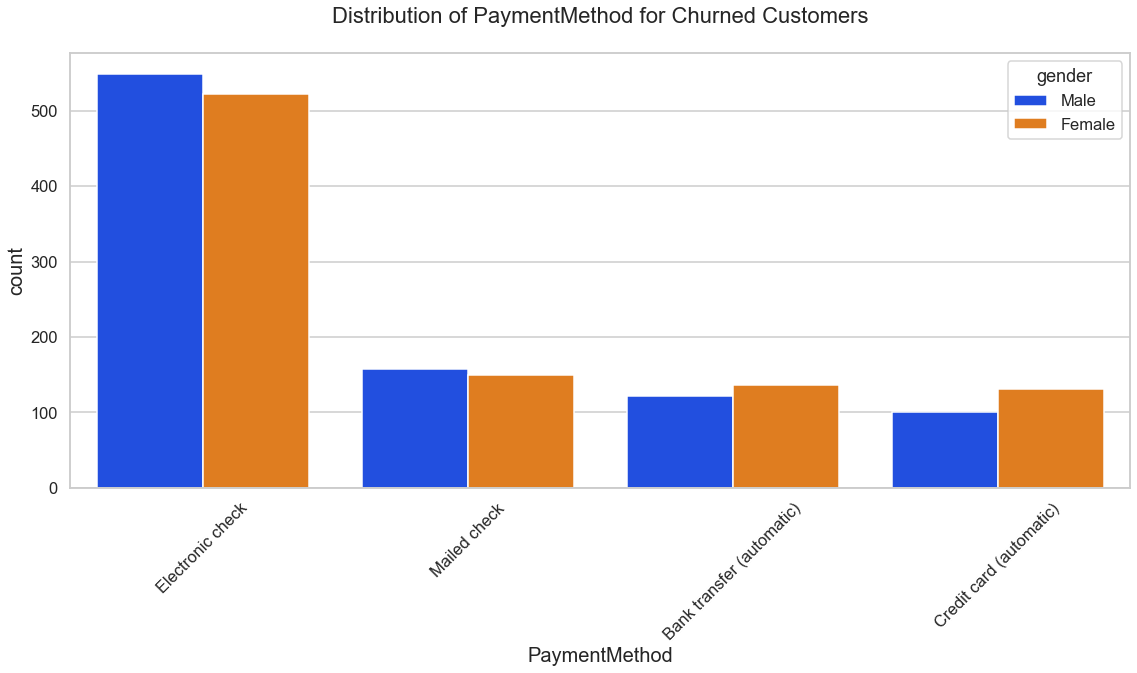

In [63]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

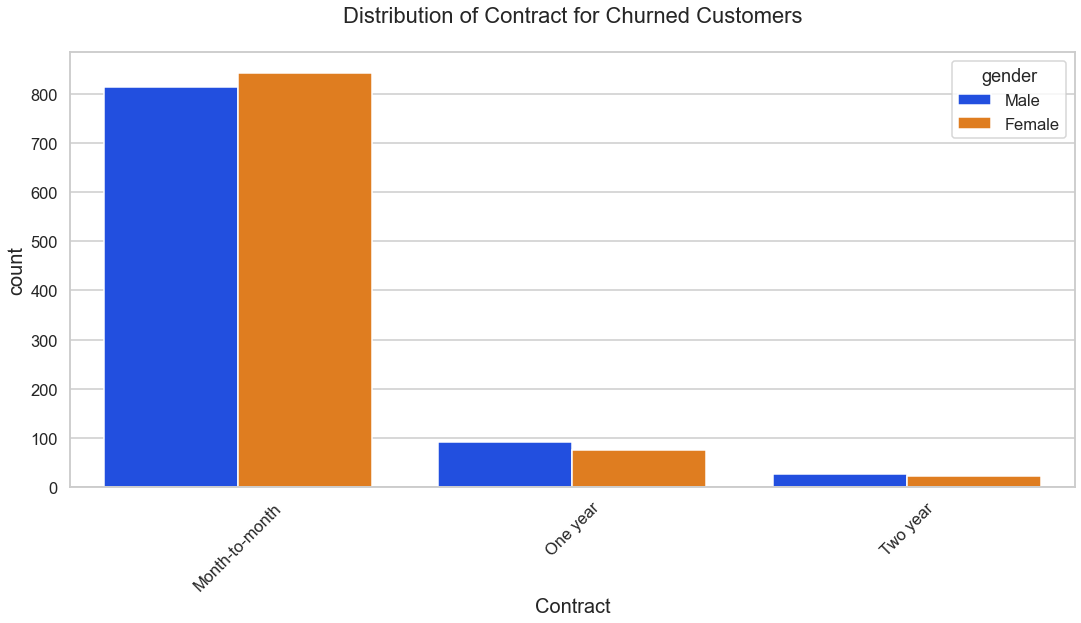

In [64]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

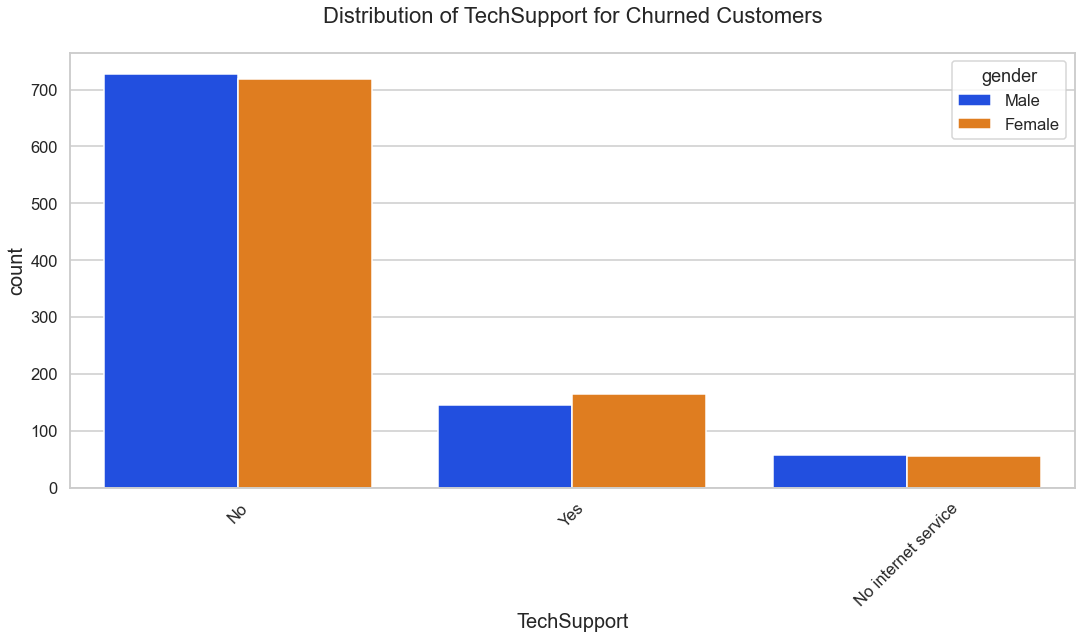

In [65]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

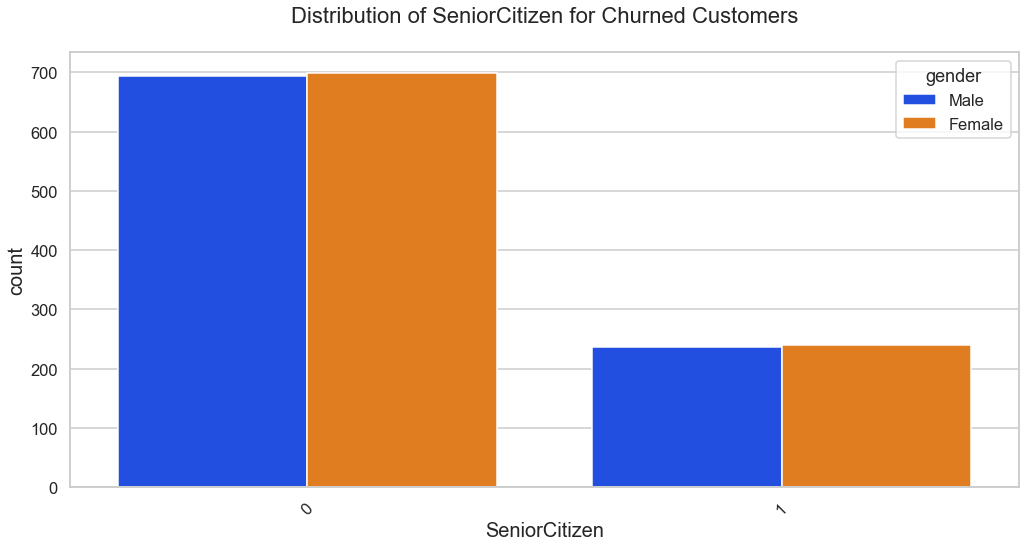

In [66]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

### CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

In [72]:
telco_base_dummies.to_csv('tel_churn.csv',index = False)

# Model Building

#### Importing Libraries

In [73]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

#### Reading CSV

In [74]:
df = pd.read_csv("tel_churn.csv")
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [75]:
x = df.drop('Churn',axis=1)
y = df['Churn']

#### Train Test Split

In [76]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#### Decision Tree Classifier

In [77]:
model_dt = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

model_dt.fit(x_train,y_train)

y_pred = model_dt.predict(x_test)

model_dt.score(x_test,y_test)

0.7924662402274343

In [78]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1019
           1       0.65      0.54      0.59       388

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

###### SMOTE on Decision Tree

In [80]:
sm = SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_resample(x, y)

xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

model_dt_smote = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [83]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9263959390862944
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       532
           1       0.91      0.96      0.93       650

    accuracy                           0.93      1182
   macro avg       0.93      0.92      0.93      1182
weighted avg       0.93      0.93      0.93      1182



In [84]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[473  59]
 [ 28 622]]


Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

Let's try with some other classifier.

#### Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [87]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [88]:
y_pred = model_rf.predict(x_test)

In [89]:
model_rf.score(x_test,y_test)

0.7917555081734187

In [90]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.92      0.87      1019
           1       0.69      0.45      0.54       388

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



###### SMOTE on Random Forest 

In [96]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [98]:
xr_train1,xr_test1,yr_train1,yr_test1 = train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [99]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state = 100,max_depth = 6, min_samples_leaf = 8)

In [100]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [101]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [102]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [103]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9280205655526992
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       515
           1       0.93      0.94      0.94       652

    accuracy                           0.93      1167
   macro avg       0.93      0.93      0.93      1167
weighted avg       0.93      0.93      0.93      1167



In [104]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[470  45]
 [ 39 613]]


With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself.

### Performing PCA

In [105]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [106]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100,max_depth = 6, min_samples_leaf = 8)

In [107]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [108]:
yr_predict_pca = model.predict(xr_test_pca)

In [109]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [110]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7035132819194516
              precision    recall  f1-score   support

           0       0.70      0.58      0.63       515
           1       0.71      0.80      0.75       652

    accuracy                           0.70      1167
   macro avg       0.70      0.69      0.69      1167
weighted avg       0.70      0.70      0.70      1167



With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage.

#### Pickling the model

In [111]:
import pickle

In [112]:
filename = 'model.sav'

In [113]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [114]:
load_model = pickle.load(open(filename, 'rb'))

In [115]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [116]:
model_score_r1

0.9280205655526992

We have trained our final model — a Random Forest Classifier combined with SMOTEENN. The model has been saved in a file called model.sav. Next, we will create APIs so that this model can be accessed and used directly from the user interface